<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Assignment_Summarizing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

Write a function which calculates the mode of a list of numbers. If there are two modes in the dataset, it should return both.

In [1]:
import numpy as np
def multi_mode_compatible(my_array):
  unique_elements,frequency = np.unique(my_array, return_counts = True)
  return unique_elements[np.where(frequency==frequency.max())[0]].tolist()

In [2]:
print("Mode(s): ", multi_mode_compatible(np.array([1,1,1,2,2,3,3,4,4,4,5,5,5])))

Mode(s):  [1, 4, 5]


# Problem 2

Perform outlier removal in the `duration` column of `phone_data.csv`

Plot the boxplot and distplot post outlier removal.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
phone_df = pd.read_csv('/content/drive/MyDrive/DATA SET/phone_data.csv')

In [6]:
phone_df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [7]:
phone_df.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [8]:
quartile_q1 = np.percentile(phone_df['duration'],25)

quartile_q2 = np.percentile(phone_df['duration'],50)

quartile_q3 = np.percentile(phone_df['duration'],75)

quartile_q4 = np.percentile(phone_df['duration'],100)

In [9]:
iqr =  quartile_q3 - quartile_q1

In [10]:
# Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
lower_limit

-80.0

In [11]:
# Calculate upper limit

upper_limit = quartile_q3 + (1.5 * iqr)
upper_limit

136.0

In [12]:
# Filter the data

new_phone_df = phone_df[(phone_df['duration']< upper_limit) & (phone_df['duration'] > lower_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


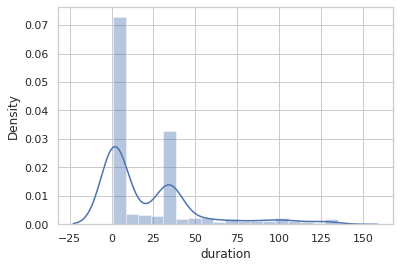

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.distplot(new_phone_df['duration'], hist=True)